# Check point: Logistic Regression

## Ali LAMINE

In [24]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# import dataset
data= pd.read_csv("C:/Users/LENOVO/Desktop/titanic-passengers.csv", sep=";")
# Replacing missing numerical values in "Age" with the median
data["Age"].fillna(data["Age"].median(), inplace=True)
# Replacing missing values in "Embarked" with the most frequent variable 
data["Embarked"].fillna(data["Embarked"].value_counts().index[0], inplace=True)
# Replacing missing values in "Cabin" by "unkown"
data["Cabin"].fillna("unknown", inplace=True)
# Encoding "Survived" into dummy variables in a new column named "encoded"
from sklearn.preprocessing import LabelBinarizer
labelbinarizer= LabelBinarizer()
data["encoded"]=labelbinarizer.fit_transform(data["Survived"])

In [26]:
# Creating a "Title" column
Title_Dictionary = {

                    "Capt":      "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "Countess" : "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }
def title (x):
    for i in range (len(x.split(" "))):
        if x.split(" ")[i][-1]==".":
            return Title_Dictionary[(x.split(" ")[i][:-1])]

data["Title"]=data["Name"].apply(title)

In [27]:
# Creation of "FamilySize" column
data["FamilySize"]= data["SibSp"] + data["Parch"]

In [28]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,encoded,Title,FamilySize
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,unknown,S,0,Mrs,0
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,0,Mrs,0
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,unknown,S,0,Mrs,0
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,unknown,S,0,Mrs,4
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,0,Mrs,1


In [29]:
data["Sex"]=data["Sex"].map({"male":0, "female":1})
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,encoded,Title,FamilySize
0,343,No,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,248740,13.0000,unknown,S,0,Mrs,0
1,76,No,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,F G73,S,0,Mrs,0
2,641,No,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,350050,7.8542,unknown,S,0,Mrs,0
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.0750,unknown,S,0,Mrs,4
4,672,No,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,S,0,Mrs,1


## Logistic Regression

### 1. Apply logistic regression. 

In [7]:
# import relevant librairies
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

In [8]:
# features extraction
x=data[["Pclass","Sex","Age","SibSp","Parch","Fare"]]
y=data["encoded"].values

In [9]:
# splitting the data with test size of 25%
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.25, random_state=0)
# build logistic regression 
logreg=LogisticRegression()
# fitting the training data
logreg.fit(x_train,y_train)
# testing the model's performance
y_pred=logreg.predict(x_test)
print("Accuracry={:.2f}".format(logreg.score(x_test,y_test)))

Accuracry=0.84


In [10]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       144
           1       0.81      0.73      0.77        79

    accuracy                           0.84       223
   macro avg       0.83      0.82      0.82       223
weighted avg       0.84      0.84      0.84       223



In [11]:
# Matthews correlation coefficient
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred)

0.6515516008011842

### 2. Use a confusion matrix to validate your model. 

In [12]:
confusion_matrix=pd.crosstab(y_test, y_pred, rownames=["Actual"], colnames=["Predicted"])
confusion_matrix

Predicted,0,1
Actual,,
0,130,14
1,21,58


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

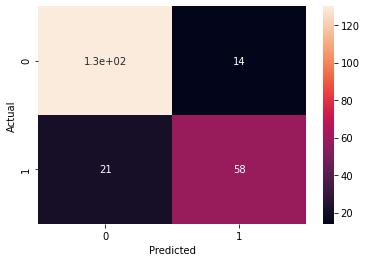

In [13]:
sns.heatmap(confusion_matrix, annot=True)

TP=130 / TN=58 / FP=14 / FN=21

### 3. Another validation matrix for classification is ROC / AUC. Do your research on them, explain them, and apply them in our case.

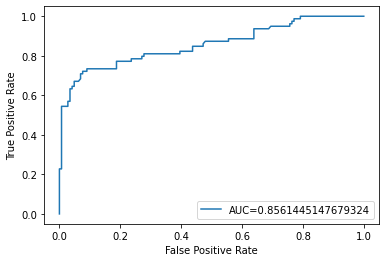

In [19]:
#define metrics
y_pred_proba = logreg.predict_proba(x_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

AUC - ROC Curve: 
In classification, there are many different evaluation metrics. The most popular is accuracy, which measures how often the model is correct. This is a great metric because it is easy to understand and getting the most correct guesses is often desired. There are some cases where you might consider using another evaluation metric.

Another common metric is AUC, area under the receiver operating characteristic (ROC) curve. The Reciever operating characteristic curve plots the true positive (TP) rate versus the false positive (FP) rate at different classification thresholds. The thresholds are different probability cutoffs that separate the two classes in binary classification. It uses probability to tell us how well a model separates the classes.

Probabilities:
Because AUC is a metric that utilizes probabilities of the class predictions, we can be more confident in a model that has a higher AUC score than one with a lower score even if they have similar accuracies.



The ROC curve is a useful tool for a few reasons:

The curves of different models can be compared directly in general or for different thresholds.
The area under the curve (AUC) can be used as a summary of the model skill.
The shape of the curve contains a lot of information, including what we might care about most for a problem, the expected false positive rate, and the false negative rate.

A skilful model will assign a higher probability to a randomly chosen real positive occurrence than a negative occurrence on average. This is what we mean when we say that the model has skill. Generally, skilful models are represented by curves that bow up to the top left of the plot.

A no-skill classifier is one that cannot discriminate between the classes and would predict a random class or a constant class in all cases. A model with no skill is represented at the point (0.5, 0.5). A model with no skill at each threshold is represented by a diagonal line from the bottom left of the plot to the top right and has an AUC of 0.5.

A model with perfect skill is represented at a point (0,1). A model with perfect skill is represented by a line that travels from the bottom left of the plot to the top left and then across the top to the top right.

An operator may plot the ROC curve for the final model and choose a threshold that gives a desirable balance between the false positives and false negatives.

# Making a new logistic regression with Family Size

In [31]:
# features extraction
x=data[["Pclass","Sex","Age","FamilySize","Fare"]]
y=data["encoded"].values
# splitting the data with test size of 25%
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.25, random_state=0)
# build logistic regression 
logreg=LogisticRegression()
# fitting the training data
logreg.fit(x_train,y_train)
# testing the model's performance
y_pred=logreg.predict(x_test)
print("Accuracry={:.2f}".format(logreg.score(x_test,y_test)))

Accuracry=0.83


In [32]:
# Classification report
print(classification_report(y_test, y_pred))
# Matthews correlation coefficient
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       144
           1       0.77      0.73      0.75        79

    accuracy                           0.83       223
   macro avg       0.82      0.81      0.81       223
weighted avg       0.83      0.83      0.83       223



0.6237345179343426

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

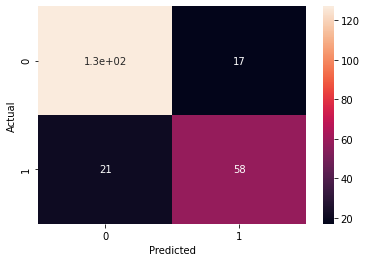

In [33]:
confusion_matrix=pd.crosstab(y_test, y_pred, rownames=["Actual"], colnames=["Predicted"])
confusion_matrix
sns.heatmap(confusion_matrix, annot=True)

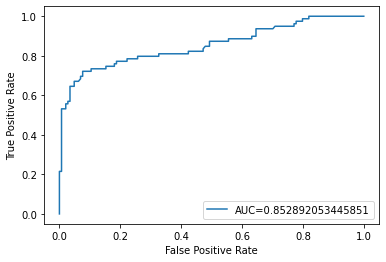

In [34]:
#define metrics
y_pred_proba = logreg.predict_proba(x_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()